<a href="https://colab.research.google.com/github/SergioAmado1408/Proyecto/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Ana Garzon, Sergio Amado

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('/content/data.xlsx')

In [ ]:
#estadisticas descriptivas
xd=pd.DataFrame(data)

In [ ]:
data.describe()

,Months,Loss (mean),Events
count,96.000000,96.00000,96.000000
mean,48.500000,7594.90625,3.385417
std,27.856777,5434.88109,2.657144
min,1.000000,158.00000,1.000000
25%,24.750000,3086.75000,1.000000
50%,48.500000,6662.50000,2.000000
75%,72.250000,10941.00000,5.250000
max,96.000000,26142.00000,9.000000


In [ ]:
Per = data["Loss (mean)"]

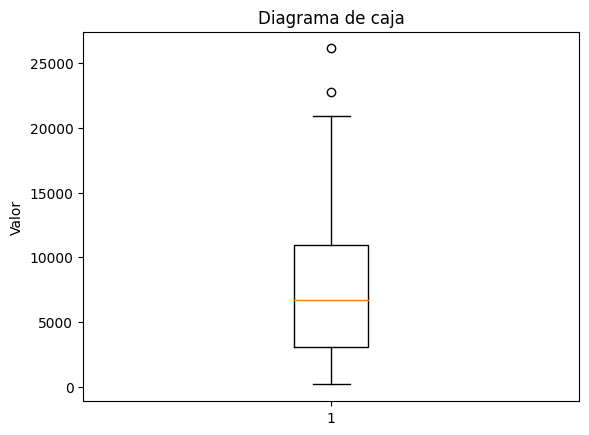

In [ ]:
# Diagrama de caja, dee perdidas
plt.boxplot(Per)
plt.ylabel('Valor')
plt.title('Diagrama de caja')
plt.show()

In [ ]:
#histograma de Eventos
eventos=xd["Events"]

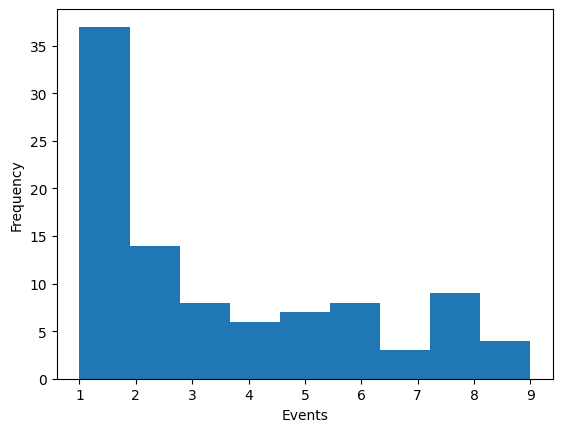

In [ ]:
plt.hist(eventos, bins=9)
plt.xlabel('Events')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# distribucion continua (perdidas)
import scipy.stats as stats

In [ ]:
Per

0       204
1     14604
2       337
3     10923
4      7557
      ...  
91     9451
92     6357
93     2877
94    10633
95     5451
Name: Loss (mean), Length: 96, dtype: int64

In [ ]:
dist = stats.norm(Per)


In [ ]:
print (dist)

<ipython-input-45-99a00a949691>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( Per, hist=True, kde=True,


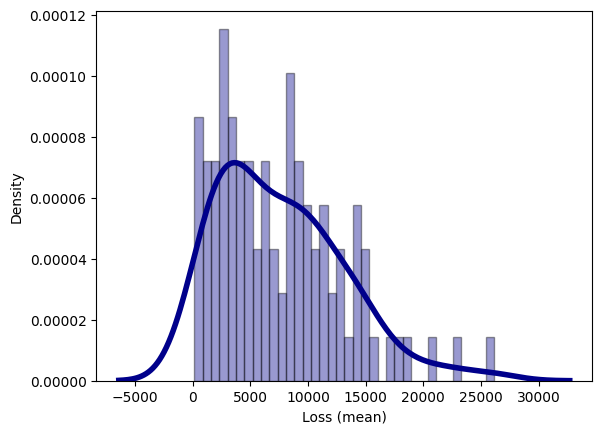

In [ ]:
sns.distplot( Per, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show();

In [ ]:
#distribucion discreta eventos
eventos

0     2
1     1
2     3
3     1
4     7
     ..
91    9
92    6
93    2
94    1
95    5
Name: Events, Length: 96, dtype: int64

In [ ]:
frecuencies=eventos.value_counts()
probabilities = frecuencies / len(data)
table = pd.DataFrame({'Valores': frecuencies.index, 'Frecuencias': frecuencies.values, 'Probabilidades': probabilities.values})

print(table)

   Valores  Frecuencias  Probabilidades
0        1           37        0.385417
1        2           14        0.145833
2        8            9        0.093750
3        3            8        0.083333
4        6            8        0.083333
5        5            7        0.072917
6        4            6        0.062500
7        9            4        0.041667
8        7            3        0.031250


In [ ]:
#Analisis
import random

In [ ]:
months = 96

In [ ]:
losses = np.zeros(1000)

In [ ]:
for i in range(1000):
    loss_total = 0
    for month in range(months):
        # Generar un valor aleatorio para la cantidad de eventos en el mes
        events = np.random.poisson(data["Events"][month])
        # Generar un valor aleatorio para la pérdida en el mes
        loss = np.random.normal(data["Loss (mean)"][month], data["Loss (mean)"][month]/2)
        # Calcular la pérdida total en el mes
        month_loss_total = events * loss
        # Agregar la pérdida total del mes a la pérdida total acumulada
        loss_total += month_loss_total
    # Guardar la pérdida total simulada
    losses[i] = loss_total

In [ ]:
print("Estadísticas de pérdida total simulada:")
print("Valor mínimo: ", np.min(losses))
print("Valor máximo: ", np.max(losses))
print("Promedio: ", np.mean(losses))
print("Desviación estándar: ", np.std(losses))

Estadísticas de pérdida total simulada:
Valor mínimo:  1624859.8880215804
Valor máximo:  2942531.938330704
Promedio:  2226662.4701937577
Desviación estándar:  224702.45261884286


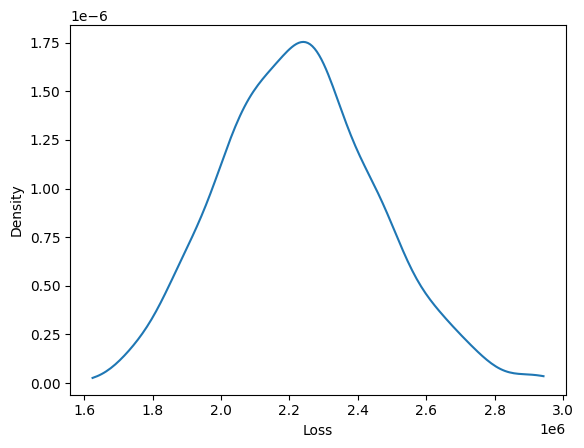

In [ ]:
# graficas ejemplificando los resultados obtenidos
from scipy.stats import gaussian_kde

density = gaussian_kde(losses)
xs = np.linspace(min(losses), max(losses), 200)
plt.plot(xs, density(xs))
plt.xlabel('Loss')
plt.ylabel('Density')
plt.show()


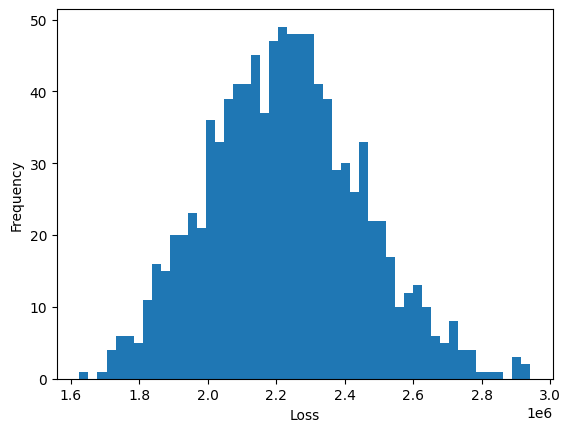

In [ ]:
plt.hist(losses, bins=50)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calcular matriz de correlación y asemejarla con los datos obtenidos
corr_matrix = data.corr()

In [ ]:
print(corr_matrix)

               Months  Loss (mean)    Events
Months       1.000000    -0.022977 -0.104027
Loss (mean) -0.022977     1.000000 -0.175386
Events      -0.104027    -0.175386  1.000000


Informe:

El problema escogido es la detección de fallos operativos de una empresa. En la actualidad, las empresas buscan una herramienta efectiva para detectar en qué medida afectan ciertos fallos que la misma podría tener. En el proyecto se muestra una base de datos en el que se describen los meses, el valor de las perdidas en el mes y la cantidad de eventos que generan esa perdida en esta periodicidad, en este caso la perdida está relacionada directamente con los eventos; es decir, cada perdida que se genera en el mes es el resultado de cierto número de eventos. Ahora bien, para comenzar a entender el modelo utilizamos distintas estadísticas descriptivas como lo son la media, la desviación estándar, mínimos y máximos, y los distintos percentiles, lo que nos permite tener un acercamiento a las variables y ver donde se concentran estas en su generalidad, además de ver los mínimos y máximos, que nos permiten plasmar los límites que tienen el proyecto. Enseguida a esto, plasmamos un gráfico de cajas sobre las perdidas, evidenciando que la mayoría de los datos se concentran alrededor de los 5.000. De la misma manera se realizó lo mismo con la variable de eventos, pero esta vez con un histograma, lo que nos mostró que la mayoría de la muestra se ubica en el evento 1, lo que ayuda a entender mejor el panorama de la influencia que tiene cada cantidad de eventos. Ahora bien, para adentrarnos un poco más en el proyecto, realizamos una distribución continua en la variable de las perdidas, lo que nos permitió más adelante en la representación del modelo Montecarlo; modelar la incertidumbre y la variabilidad de las pérdidas de una manera realista y flexible. De la misma manera, para entender la variable de Eventos, implementamos el uso de una distribución discreta, lo que nos da un panorama del valor más común, además de la frecuencia con el que se presenta y finalmente la probabilidad que tiene ese dato en presentarse sobre los demás. Por otro lado, a la hora de desarrollar el modelo Montecarlo,  que se realizó para 1000 iteraciones, donde se generan variables aleatorias sobre X y Y ; las cuales son los Eventos y las Perdidas. De esto se  puede concluir lo siguiente:

-	La pérdida total simulada tiene un rango un tanto amplio, desde un mínimo de 1.624.859 hasta un máximo de 2.942.531 lo que indica que hay una alta variabilidad.

-	El promedio de la pérdida total simulada es de 2.226.662 lo que sugiere que, en promedio, la empresa puede esperar incurrir en una pérdida de esta magnitud en un mes determinado.

-	La desviación estándar de la pérdida total simulada es de 224.702, lo que indica que hay una gran dispersión de los resultados del modelo alrededor de la media. Es decir, la empresa debe estar preparada para enfrentar una pérdida que puede estar  por encima o por debajo del promedio.

Por otro lado, a través del resultado se pueden implementar gráficos, como el histograma; donde se observa que la distribución parece ser sesgada hacia la derecha, con un sesgo positivo , lo que significa que las perdidas tienden a estar más cerca del extremo superior de la distribución.

En conclusión, a través de la modelación de la base de datos, se  obtienen resultados que logran de ser de suma importancia para las empresas, porque a través de este pueden ver donde se ubican dentro del modelo, y así mismo saber cómo se encuentra su situación actual, lo que le permitiría tomar las acciones pertinentes para mejorar con respecto al futuro de la empresa. 







